Library Yang Akan Di Gunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Memanggil Dataset

In [2]:
df = pd.read_csv('TCS.csv')

Deskripsi Dataset

In [3]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.00,1968.30,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.40,1971.00,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.00,1985.00,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.00,1979.60,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.90,1973.00,1999.85,1995.20,1680420.0,33463.26
5,2018-12-10,1975.00,2011.00,1960.00,1961.00,1975.80,2010786.0,39990.73
6,2018-12-11,1970.00,2010.00,1961.00,1997.05,2000.00,2942014.0,58636.26
7,2018-12-12,2001.10,2022.00,1984.95,2016.50,2016.80,2219993.0,44663.42
8,2018-12-13,2024.00,2029.70,1974.50,1981.95,1982.60,3748429.0,74802.38
9,2018-12-14,1983.00,1998.95,1975.25,1989.00,1989.75,2473761.0,49094.42


Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  20 non-null     object 
 1   Open                  20 non-null     float64
 2   High                  20 non-null     float64
 3   Low                   20 non-null     float64
 4   Last                  20 non-null     float64
 5   Close                 20 non-null     float64
 6   Total Trade Quantity  20 non-null     float64
 7   Turnover (Lacs)       20 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.4+ KB


Mencari Heatmap

<Axes: >

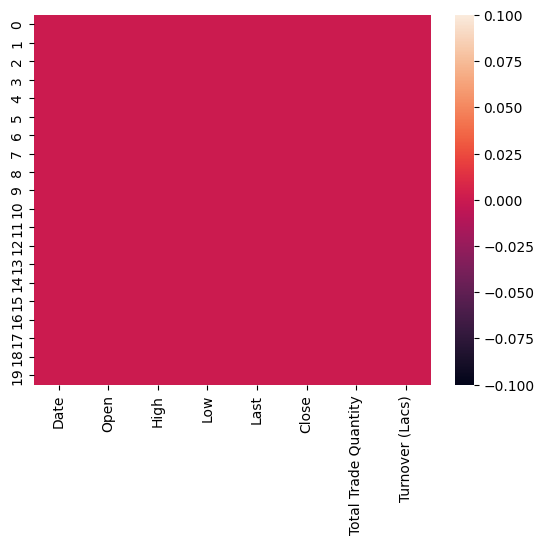

In [5]:
sns.heatmap(df.isnull())

Melihat Nilai Data

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,20.000000,20.0000,20.000000,20.00000,20.000000,2.000000e+01,20.000000
mean,1967.312500,1983.3975,1945.655000,1962.97750,1962.952500,2.467144e+06,48423.724000
std,36.938946,38.7280,42.023142,42.98135,44.704991,8.906054e+05,17225.204775
min,1905.800000,1909.0000,1870.250000,1892.00000,1889.200000,1.227921e+06,24482.950000
25%,1941.450000,1947.9250,1902.000000,1918.77500,1916.112500,1.875834e+06,35820.857500
50%,1983.000000,2000.4750,1964.650000,1982.97500,1982.500000,2.280173e+06,45388.200000
75%,1993.425000,2012.5000,1975.537500,1993.93750,1994.525000,2.611658e+06,52257.487500
max,2024.000000,2029.7000,1985.000000,2016.50000,2016.800000,4.968201e+06,95411.460000


Visualisasi Data

C:\Users\Irpan\AppData\Local\Temp\ipykernel_13016\4229262612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


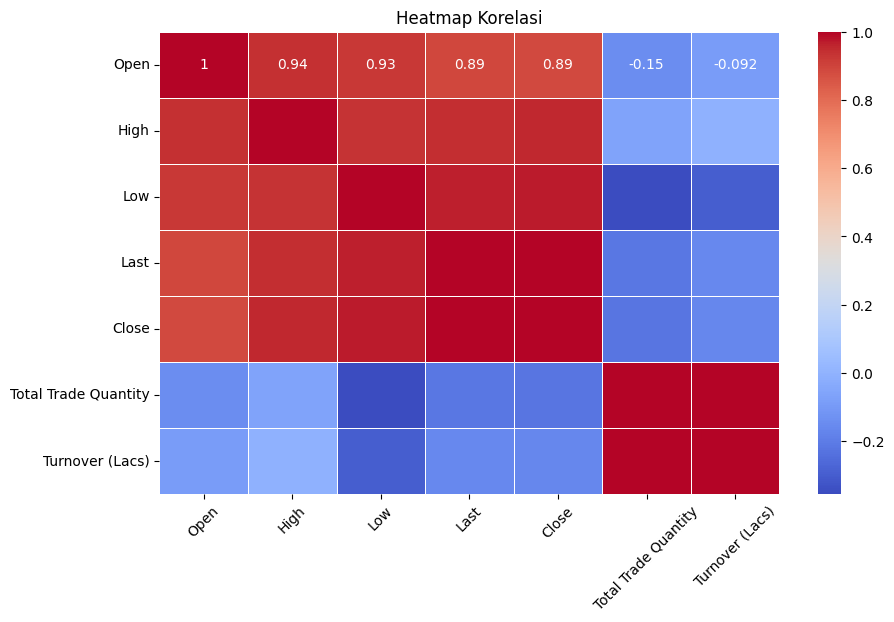

In [7]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.xticks(rotation=45)
plt.show()

In [8]:
brands = df['Open'].value_counts().reset_index()
brands.columns = ['Date', 'Turnover (Lacs)']

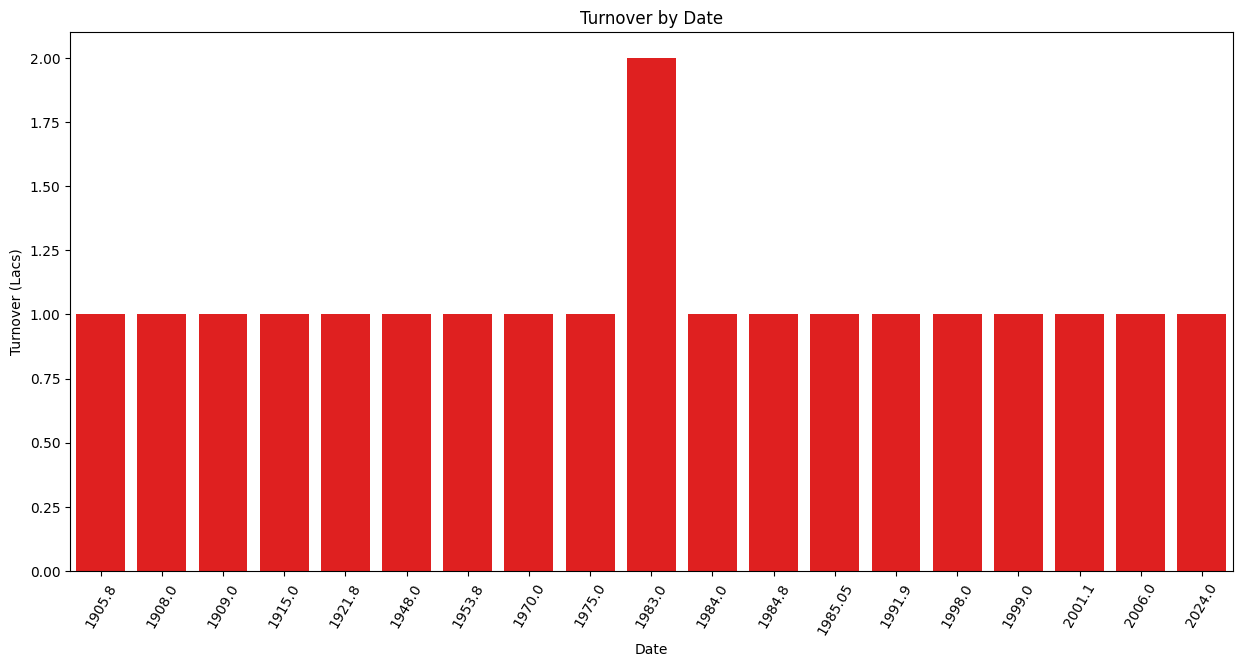

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(data=brands, x='Date', y='Turnover (Lacs)', color='red')
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Turnover (Lacs)')
plt.title('Turnover by Date')
plt.show()

In [10]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Modeling Data<br>

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
x = df[['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity']]
y = df['Turnover (Lacs)']

Split Data Training And Testing

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

Membuat Regresi Linear

In [14]:
LR = LinearRegression()

In [15]:
LR.fit(x_train,y_train)

LinearRegression()

In [16]:
y = LR.score(x_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9982733197394082


Evaluasi

In [17]:
#Open) = 2024, High	= 2029 , Low = 7.85 , Last	 = 2016 , Close = 2016,  Total Trade Quantity = 4.9 
inputan = np.array([[2024, 2029, 1985, 2016, 2016, 4.9]])
prediksi = LR.predict(inputan)
print('Estimasi Jumlah TO dalam setiap size menu : ', prediksi)

Estimasi Jumlah TO dalam setiap size menu :  [863.00265979]


c:\Users\Irpan\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Deployment

In [18]:
import pickle
filename = 'stock_market.sav'
pickle.dump(LR,open(filename,'wb'))